## Домашнее задание 2: Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается.

* Старайтесь сделать код как можно более оптимальным и читаемым.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

**Задание 1 (1 балл)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [3]:
data.shape

(53940, 11)

In [4]:
# your code here
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

<font color='blue'>
Как видим в данных отсутсвуют null значения. Но зато есть нулевые значения признаков x,y,z, что можно трактовать как пропуски, так как драгоценный камень не может иметь нулевой объем. (наличие этих случаев можно видеть по результату выполнения ячейки ниже)


(Обратить внимание на нули помогло исследование этого датасета опубликованное тут https://www.kaggle.com/code/bhuvanchennoju/s-s-experimets-fun-with-r2-99-21)

</font>

In [5]:
temp_df = data.copy()
temp_df = temp_df.replace(0, np.nan)
temp_df.isna().sum()

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              8
y              7
z             20
dtype: int64

<font color='blue'>Удалим все такие строки из датасета.</font>

In [6]:
data = data[(data['x'] != 0) | (data['y'] != 0) | (data['z'] != 0)]

**Задача 2 (1 балл)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование).

In [7]:
# your code here
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<font color='blue'>В колонке 'Unnamed: 0' дублируется индекс (вернее значение индекс+1). Эту колонку разумно удалить - она не несет никакой полезной инфорции. Это просто порядковый номер строки в датасете.</font>

In [8]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [9]:
data = data.drop(columns=['Unnamed: 0'])

<font color='blue'>Теперь когда удалена колонка с дубликатом индекса разумно удалить из датасета все дубликаты строк (если они есть). А они таки есть! (см. результат выполнения ячейки ниже)</font>

In [10]:
data[data.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


<font color='blue'>Удаляем дубликаты и пересоздаем индекс. (Опять же эта обработка навеяна работой https://www.kaggle.com/code/bhuvanchennoju/s-s-experimets-fun-with-r2-99-21)</font>

In [11]:
data = data.drop_duplicates()
data = data.reset_index(drop = True)

In [12]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53783,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53784,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53785,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53786,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задание 3 (1 балл)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками. Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [13]:
# your code here
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.027850,0.181117,0.921566,0.977546,0.953979,0.955611
depth,0.027850,1.000000,-0.297543,-0.011085,-0.025288,-0.029335,0.095001
table,0.181117,-0.297543,1.000000,0.126582,0.195498,0.183839,0.150823
price,0.921566,-0.011085,0.126582,1.000000,0.886891,0.867691,0.863492
x,0.977546,-0.025288,0.195498,0.886891,1.000000,0.974520,0.970603
y,0.953979,-0.029335,0.183839,0.867691,0.974520,1.000000,0.951708
z,0.955611,0.095001,0.150823,0.863492,0.970603,0.951708,1.000000


<font color='blue'>Наиболее сильные корреляции с таргетом (price) имеют признаки carat, x, y, z.</font>

**Задание 4 (1 балл)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования (pd.get_dummies). Не забудьте поставить значение параметра drop_first равным True.

In [14]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [15]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [16]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [17]:
# your code here
data=pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)

**Задание 5 (1 балл)** 
Создайте матрицу X, содержащую все признаки, и не содержащую целевую переменную price. Также создайте вектор y, содержащий целевую переменную price.

In [18]:
# your code here
X = data.drop(columns=['price'])
y = data['price']

**Задание 5 (1 балл)** 
Перемешайте данные! 

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [19]:
from sklearn.model_selection import train_test_split
seed = 7456
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)

**Задание 6 (1 балл)** Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

После применения масштабирования матрица перестает быть объектом Pandas Dataframe - решите эту проблему.

In [20]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
onehot_features = ['cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']

In [21]:
from sklearn.preprocessing import StandardScaler

# your code here
def train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, scaler):

    Xtrain_scaled = scaler.fit_transform(Xtrain[numeric_features])
    Xtest_scaled = scaler.transform(Xtest[numeric_features])

    Xtrain_scaled = pd.DataFrame(Xtrain_scaled)
    Xtest_scaled = pd.DataFrame(Xtest_scaled)

    Xtrain_scaled.columns = numeric_features
    Xtest_scaled.columns = numeric_features

    Xtrain_scaled = pd.concat([Xtrain_scaled, Xtrain[onehot_features].reset_index()], axis=1)
    Xtest_scaled = pd.concat([Xtest_scaled, Xtest[onehot_features].reset_index()], axis=1)

    Xtrain_scaled = Xtrain_scaled.drop(columns=['index'])
    Xtest_scaled = Xtest_scaled.drop(columns=['index'])
    
    return Xtrain_scaled, Xtest_scaled

Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())

**Задание 7 (1 балл)** Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках.

<font color='blue'>Помимо прочего заведем список experiments, куда будем сохранять результаты экспериментов, чтобы затем сравнить и сделать выводы.</font>

In [22]:
from sklearn.linear_model import LinearRegression

experiments = list()

# your code here
def train_model(x_train, x_test, y_train, y_test, model, verbose=True):
    model.fit(x_train, y_train)
    train_r2 = model.score(x_train, y_train)
    test_r2 = model.score(x_test, y_test)
    
    if verbose:
        print(f'Train R2: {train_r2:0.4f}')
        print(f'Test R2: {test_r2:0.4f}')    
    
    return model, train_r2, test_r2

model, train_r2, test_r2  = train_model(Xtrain_scaled, Xtest_scaled, ytrain, ytest, LinearRegression())

experiments.append(['scaled', numeric_features, train_r2, test_r2])

Train R2: 0.9201
Test R2: 0.9202


**Задание 8 (1 балл)** Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [23]:
# your code here
model.coef_

array([ 5402.49393119,   -96.16997731,   -58.21181634, -1187.70615279,
          -5.70765832,   -25.95129171,   593.16158421,   840.09706798,
         761.80051441,   728.30914636,  -229.28908194,  -286.23186907,
        -496.64118813,  -978.1124636 , -1491.36611629, -2365.29245358,
        5309.80974837,  3653.76732717,  2688.68075545,  4574.50342698,
        4257.0661538 ,  4991.09928184,  4956.1918161 ])

In [24]:
Xtrain_scaled.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [25]:
model.intercept_

-183.27346840750715

In [26]:
import seaborn as sns
def show_weights(features, weights):
    fig, axs = plt.subplots(figsize=(10, 5), ncols=1)
    sorted_weights = sorted(zip(weights, features), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs)
    axs.set_xlabel("Weight")

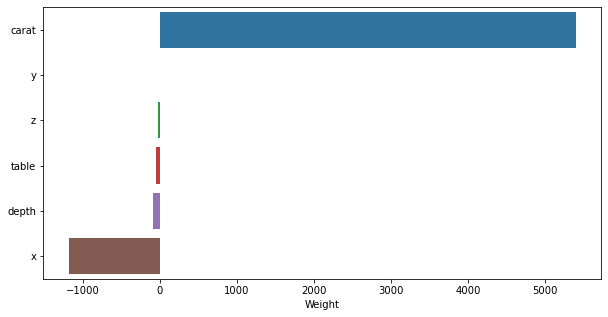

In [27]:
show_weights(numeric_features, model.coef_)

<font color='blue'>Как можно видеть на диаграмме веса вещественных признаков 'x' и 'carat' по модулю на порядки больше, чем у вещественных признаков 'y', 'z', 'table', 'depth'</font>

<font color='blue'> Диаграмма весов всех признаков (в т.ч. onehot) представлена ниже</font>

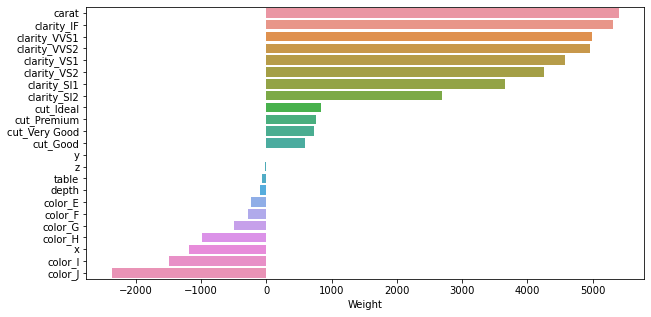

In [28]:
show_weights(Xtrain_scaled.columns, model.coef_)

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие. Поэтому за каждое из них можно получить до двух баллов.

**Задание 9* (2 балла)** Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц Xtrain и Xtest признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?
Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

<font color='blue'>Учитывая корреляцию между признаками 'carat','x','y','z' - попробуем разные варианты сокращенных наборов вещественных признаков:</font>

In [29]:
# your code here
numeric_features_variants = (['carat', 'depth', 'table', 'x'],
                             ['carat', 'depth', 'table', 'x', 'y'],
                             ['carat', 'depth', 'table', 'y'],
                             ['carat', 'depth', 'table', 'y', 'z'],
                             ['carat', 'depth', 'table', 'z'],
                             ['carat', 'depth', 'table', 'z', 'x'],
                             ['carat', 'depth', 'table'],
                             ['depth', 'table', 'x'],
                             ['depth', 'table', 'x', 'y', 'z'],
                             ['carat', 'depth', 'x'],
                             ['carat', 'x'])

for numeric_features in numeric_features_variants:
    print(f'numeric features: {numeric_features}')
    Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())
    _, train_r2, test_r2 = train_model(Xtrain_scaled, Xtest_scaled, ytrain, ytest, LinearRegression())
    experiments.append(['scaled', numeric_features, train_r2, test_r2])
    print()

numeric features: ['carat', 'depth', 'table', 'x']
Train R2: 0.9201
Test R2: 0.9202

numeric features: ['carat', 'depth', 'table', 'x', 'y']
Train R2: 0.9201
Test R2: 0.9202

numeric features: ['carat', 'depth', 'table', 'y']
Train R2: 0.9178
Test R2: 0.9175

numeric features: ['carat', 'depth', 'table', 'y', 'z']
Train R2: 0.9185
Test R2: 0.9185

numeric features: ['carat', 'depth', 'table', 'z']
Train R2: 0.9180
Test R2: 0.9181

numeric features: ['carat', 'depth', 'table', 'z', 'x']
Train R2: 0.9201
Test R2: 0.9202

numeric features: ['carat', 'depth', 'table']
Train R2: 0.9164
Test R2: 0.9153

numeric features: ['depth', 'table', 'x']
Train R2: 0.8463
Test R2: 0.8436

numeric features: ['depth', 'table', 'x', 'y', 'z']
Train R2: 0.8464
Test R2: 0.8435

numeric features: ['carat', 'depth', 'x']
Train R2: 0.9200
Test R2: 0.9201

numeric features: ['carat', 'x']
Train R2: 0.9197
Test R2: 0.9197



<font color='blue'>Как видно улучшения метрики R2 не достигнуто. Но также видно, что если исключить признаки 'y' и 'z', то качество модели не ухудшилось. А если еще удалить признак 'table', то качество модели ухудшилось не значительно.</font>

<font color='blue'>Попробуем также обучить модель без нормализации данных:</font>

In [30]:
 numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [31]:
_, train_r2, test_r2 = train_model(Xtrain, Xtest, ytrain, ytest, LinearRegression())
experiments.append(['non-scaled', numeric_features, train_r2, test_r2])

Train R2: 0.9201
Test R2: 0.9202


In [32]:
_, train_r2, test_r2 = train_model(Xtrain.drop(columns=['z']), Xtest.drop(columns=['z']), ytrain, ytest, LinearRegression())
experiments.append(['non-scaled w\o "z"', ['carat', 'depth', 'table', 'x', 'y'], train_r2, test_r2])

Train R2: 0.9201
Test R2: 0.9202


In [33]:
_, train_r2, test_r2 = train_model(Xtrain.drop(columns=['z', 'y']), Xtest.drop(columns=['z', 'y']), ytrain, ytest, LinearRegression())
experiments.append(['non-scaled w\o "y,z"', ['carat', 'depth', 'table', 'x'], train_r2, test_r2])

Train R2: 0.9201
Test R2: 0.9202


<font color='blue'>Отсутствие нормализации данных не ухудшило качество, но и не улучшило.</font>

**Задание 10* (2 балла)** Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель (можно черпать идеи из ноутбука занятия 3). Помогло ли это улучшить качество модели?

<font color='blue'> Добавим новые признаки: степени 'carat' от 2-oй до 5-oй: </font>

In [34]:
data_additional_features = data.copy()

In [35]:
def add_features(df, feature, n=5):
    for i in range(2,n+1):
        df[f'{feature}{i}'] = df[feature].apply(lambda x: x**i)
    
    return df

In [36]:
data_additional_features = add_features(data_additional_features, 'carat')

<font color='blue'>И степени 'x' от 2-oй до 5-oй: </font>

In [37]:
data_additional_features = add_features(data_additional_features, 'x')

In [38]:
X = data_additional_features.drop(columns=['price'])
y = data_additional_features['price']

<font color='blue'>Обучим модель с новыми признаками (при этом исключим признаки y и z, т.к. как мы выяснили, что они не дают прибавки к метрике R2)</font>

In [39]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'carat2', 'carat3', 'carat4', 'carat5', 
                    'depth', 'table', 
                    'x', 'x2', 'x3', 'x4', 'x5']
Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())
_, train_r2, test_r2 = train_model(Xtrain_scaled, Xtest_scaled, ytrain, ytest, LinearRegression())
experiments.append(['scaled + add features carat,x + wo y,z', numeric_features, train_r2, test_r2])

Train R2: 0.9304
Test R2: 0.9296


<font color='blue'>И попробуем обучить модель с дополнительными признаками, но без нормализации:</font>

In [40]:
_, train_r2, test_r2 = train_model(Xtrain.drop(columns=['z', 'y']), Xtest.drop(columns=['z', 'y']), ytrain, ytest, LinearRegression())
experiments.append(['non-scaled + add features carat,x + wo y,z', numeric_features, train_r2, test_r2])

Train R2: 0.9304
Test R2: 0.9296


<font color='blue'>Добавление признаков дало улучшение метрики R2 как на тестовой так и на обучающей выборках при этом нормализация данных тут также не дает никакого эффекта в метрике R2</font>

<font color='blue'> Попробуем теперь исключить выбросы (не добавляя новые признаки). (Тоже навеяно работой https://www.kaggle.com/code/bhuvanchennoju/s-s-experimets-fun-with-r2-99-21)</font>

In [41]:
numeric_data = data.copy().select_dtypes(exclude = 'object')
for col in numeric_data.columns:
    numeric_data[col] = np.abs((data[col] - data[col].mean())/data[col].std())
    
max_std = 3

outliers = data[(numeric_data['x'] > max_std)| 
                (numeric_data['y'] > max_std)| 
                (numeric_data['z'] > max_std)| 
                (numeric_data['price'] > max_std)| 
                (numeric_data['depth'] > max_std)| 
                (numeric_data['table'] > max_std)]

data_wo_outliers = data.drop(index = outliers.index).reset_index(drop = True)

In [42]:
X = data_wo_outliers.drop(columns=['price'])
y = data_wo_outliers['price']

<font color='blue'>Не нормализованные данные без выбросов:</font>

In [43]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
_, train_r2, test_r2 = train_model(Xtrain, Xtest, ytrain, ytest, LinearRegression())
experiments.append(['non-scaled + wo outliers', numeric_features, train_r2, test_r2])

Train R2: 0.9263
Test R2: 0.9230


<font color='blue'>Нормализованные данные без выбросов:</font>

In [44]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())
_, train_r2, test_r2 = train_model(Xtrain_scaled, Xtest_scaled, ytrain, ytest, LinearRegression())
experiments.append(['scaled + wo outliers', numeric_features, train_r2, test_r2])

Train R2: 0.9263
Test R2: 0.9230


<font color='blue'>Не нормализованные данные без выбросов и без признаков y, z:</font>

In [45]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'depth', 'table', 'x']
_, train_r2, test_r2 = train_model(Xtrain.drop(columns=['y', 'z']), Xtest.drop(columns=['y', 'z']), ytrain, ytest, LinearRegression())
experiments.append(['non-scaled + wo outliers + wo "y,z"', numeric_features, train_r2, test_r2])

Train R2: 0.9258
Test R2: 0.9227


<font color='blue'>Нормализованные данные без выбросов и без признаков y, z:</font>

In [46]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'depth', 'table', 'x']
Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())
_, train_r2, test_r2 = train_model(Xtrain_scaled, Xtest_scaled, ytrain, ytest, LinearRegression())
experiments.append(['scaled + wo outliers + wo y,z', numeric_features, train_r2, test_r2])

Train R2: 0.9258
Test R2: 0.9227


<font color='blue'>Любопытно, что исключение выбросов во-первых улучшило метрику R2 (относительно моделей без доп. признаков), а во-вторых привело к тому, что исключение признаков y и z ухудшает качество модели. Нормализация данных попрежнему никак не влияет на качество.<font>

<font color='blue'>Попробуем теперь добавить признаки в датасет без выбросов (в т.ч. степени y и z, ведь в датасете без выбросов они полезны)</font>

In [47]:
data_additional_features_wo_outliers = data_wo_outliers.copy()

In [48]:
data_additional_features_wo_outliers = add_features(data_additional_features_wo_outliers, 'carat')
data_additional_features_wo_outliers = add_features(data_additional_features_wo_outliers, 'x')
data_additional_features_wo_outliers = add_features(data_additional_features_wo_outliers, 'y')
data_additional_features_wo_outliers = add_features(data_additional_features_wo_outliers, 'z')

In [49]:
X = data_additional_features_wo_outliers.drop(columns=['price'])
y = data_additional_features_wo_outliers['price']

<font color='blue'>С нормализацией:</font>

In [50]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'carat2', 'carat3', 'carat4', 'carat5', 
                    'depth', 'table', 
                    'x', 'x2', 'x3', 'x4', 'x5',
                    'y', 'y2', 'y3', 'y4', 'y5',
                    'z', 'z2', 'z3', 'z4', 'z5']
Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())
_, train_r2, test_r2 = train_model(Xtrain_scaled, Xtest_scaled, ytrain, ytest, LinearRegression())
experiments.append(['scaled + add features carat,x,y,z + wo outliers', numeric_features, train_r2, test_r2])

Train R2: 0.9352
Test R2: 0.9318


<font color='blue'>Без нормализации:</font>

In [51]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3, random_state=seed)
numeric_features = ['carat', 'carat2', 'carat3', 'carat4', 'carat5', 
                    'depth', 'table', 
                    'x', 'x2', 'x3', 'x4', 'x5',
                    'y', 'y2', 'y3', 'y4', 'y5',
                    'z', 'z2', 'z3', 'z4', 'z5']
_, train_r2, test_r2 = train_model(Xtrain, Xtest, ytrain, ytest, LinearRegression())
experiments.append(['non-scaled + add features carat,x,y,z + wo outliers', numeric_features, train_r2, test_r2])

Train R2: 0.9352
Test R2: 0.9318


<font color='blue'>Нормализация данных опять ничего не дала, но мы таки добились максимального качества R2 0.93+ из всех проведенных экспериментов!</font>

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

Также (по желанию) напишите, была ли эта домашняя работа для вас интересной.

<font color='blue'>Взглянем на результаты всех наших экспериментов, упорядочив их по значению R2 на тестовой выборке:</font>

In [52]:
pd.DataFrame(experiments, columns=['comments', 'numeric features', 'train R2', 'test R2'])\
.sort_values(by='test R2', ascending=False)\
.reset_index(drop=True)

,comments,numeric features,train R2,test R2
0,"scaled + add features carat,x,y,z + wo outliers","[carat, carat2, carat3, carat4, carat5, depth,...",0.935241,0.931830
1,"non-scaled + add features carat,x,y,z + wo out...","[carat, carat2, carat3, carat4, carat5, depth,...",0.935241,0.931830
2,"scaled + add features carat,x + wo y,z","[carat, carat2, carat3, carat4, carat5, depth,...",0.930368,0.929561
3,"non-scaled + add features carat,x + wo y,z","[carat, carat2, carat3, carat4, carat5, depth,...",0.930368,0.929561
4,scaled + wo outliers,"[carat, depth, table, x, y, z]",0.926256,0.923002
5,non-scaled + wo outliers,"[carat, depth, table, x, y, z]",0.926256,0.923002
6,"scaled + wo outliers + wo y,z","[carat, depth, table, x]",0.925842,0.922726
7,"non-scaled + wo outliers + wo ""y,z""","[carat, depth, table, x]",0.925842,0.922726
8,scaled,"[carat, depth, table, z, x]",0.920102,0.920222
9,non-scaled,"[carat, depth, table, x, y, z]",0.920102,0.920220


<font color='blue'>

1. Как ни странно, но нормализация данных не дала улучшения качества R2.

2. Базовая модель дала качество R2 0.92

3. Качество модели R2 ~ 0.91 можно добиться исключив признаки x,y,z из данных, что видимо объясняется корреляцией признака carat (по сути масса бриллианта) с линейными размерыми бриллианта.

4. Исключение из данных выбросов, позволяет добиться качества R2 ~ 0.922 (чуть лучше базовой)
    
5. Исключение выбросов и добавление новых признаков (степени carat, x, y, z) позволяет добиться качества R2 ~ 0.93. Это обеспечило наилучший результат среди всех экспериментов.
</font>

<font color='blue'>Значение R2 около 0.9 на тестовой выборке указывает на то, что примерно 90% вариации зависимой переменной (price) объясняется независимыми переменными модели (признаками). Это обычно считается очень хорошим результатом.<font>

<font color='blue'>Работа с этим датасетом была интересной. Любопытно было изучить как пользователи kaggle иследовали этот датасет и пробовали разные модели. Особенно впечатлила работа https://www.kaggle.com/code/bhuvanchennoju/s-s-experimets-fun-with-r2-99-21 - где автор смог добиться от линейной регрессии (с помощью глубоко статистического анализа и хитрого инжинирига данных) на тесте r2 ~ 0.95. Также во многих работах была показана высокая эффективность нелинейных моделей (решающие деревья и подобные.) r2 ~ 0.99. </font>